In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/project/ALI/data_covid.csv", index_col=[0])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df

,date_positive,days_dose1,days_dose2,days_dose3,brand1,brand2,brand3,state,age,male,comorb,malaysian,death
0,2020-01-25,0.0,0.0,0.0,NaN,NaN,NaN,1,40,1,1,0,0
1,2020-01-29,0.0,0.0,0.0,NaN,NaN,NaN,1,34,0,0,0,0
2,2020-01-29,0.0,0.0,0.0,NaN,NaN,NaN,1,52,1,0,0,0
3,2020-01-29,0.0,0.0,0.0,NaN,NaN,NaN,2,4,0,1,0,0
4,2020-01-30,0.0,0.0,0.0,NaN,NaN,NaN,1,49,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4416354,2022-05-06 00:00:00,0.0,0.0,0.0,NaN,NaN,NaN,2,90,1,1,1,1
4416355,2022-05-03 00:00:00,0.0,0.0,0.0,NaN,NaN,NaN,2,54,0,1,1,1
4416356,2022-05-03 00:00:00,218.0,197.0,0.0,p,p,NaN,9,81,1,1,1,1
4416357,2022-05-03 00:00:00,298.0,277.0,34.0,p,p,p,14,91,0,1,1,1


#EDA 

In [5]:
# import library
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
df_death = df[df['death'] == 1]
df_serv = df[df['death'] == 0]

In [7]:
df_death['date_positive'] = pd.to_datetime(df_death['date_positive'])
df_serv['date_positive'] = pd.to_datetime(df_serv['date_positive'])

In [8]:
dataframe1= df_death.groupby(['date_positive', 'male']).size().reset_index(name='count')
dataframe2= df_serv.groupby(['date_positive', 'male']).size().reset_index(name='count')

In [9]:
dataframe1 = dataframe1.set_index("date_positive")
dataframe2 = dataframe2.set_index("date_positive")


<BarContainer object of 1207 artists>

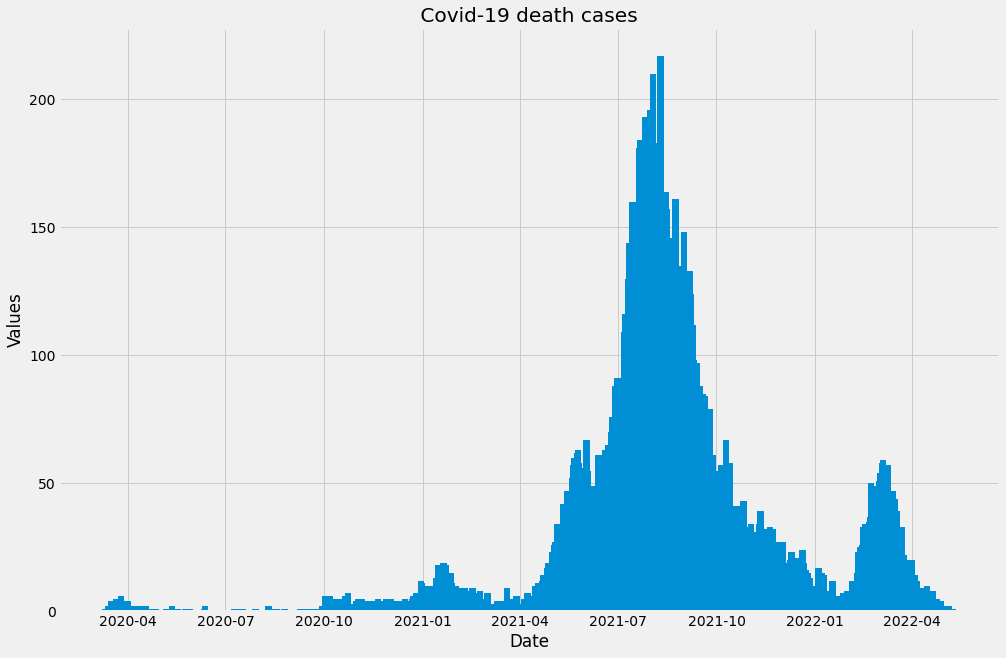

In [10]:
import matplotlib.pyplot as plt
 
# Using a inbuilt style to change
# the look and feel of the plot
plt.style.use("fivethirtyeight")
 
# setting figure size to 12, 10
plt.figure(figsize=(15, 10))
 
# Labelling the axes and setting a
# title
plt.xlabel("Date")
plt.ylabel("Values")
plt.title(" Covid-19 death cases ")
 
# plotting the "A" column alone
plt.bar(dataframe1.index, dataframe1["count"], width=6)

<BarContainer object of 1608 artists>

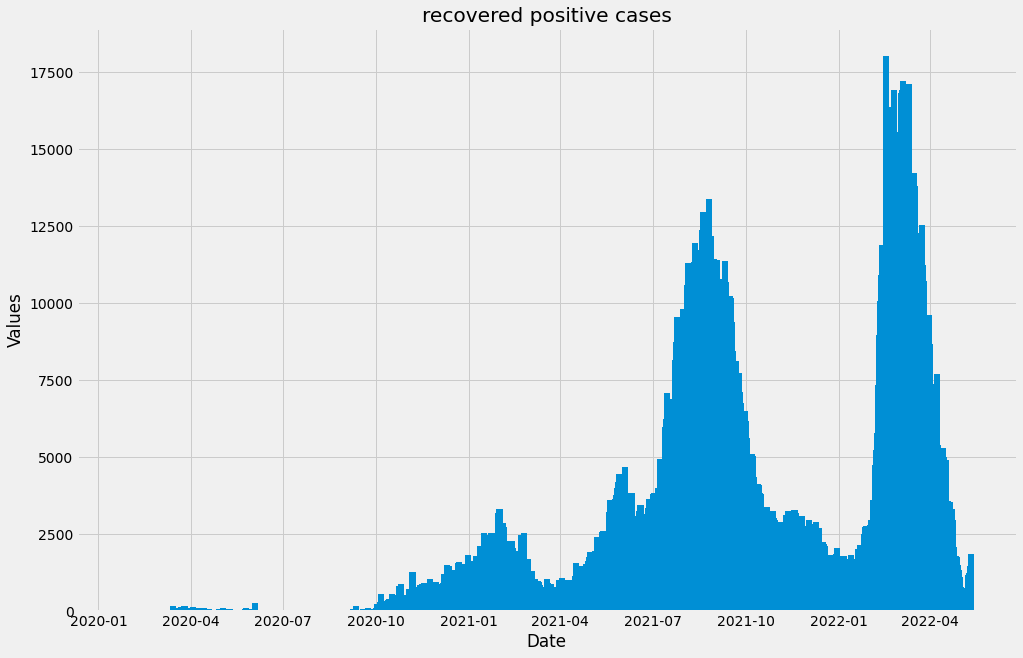

In [11]:
import matplotlib.pyplot as plt
 
# Using a inbuilt style to change
# the look and feel of the plot
plt.style.use("fivethirtyeight")
 
# setting figure size to 12, 10
plt.figure(figsize=(15, 10))
 
# Labelling the axes and setting a
# title
plt.xlabel("Date")
plt.ylabel("Values")
plt.title("recovered positive cases")
 
# plotting the "A" column alone
plt.bar(dataframe2.index, dataframe2["count"], width=6)

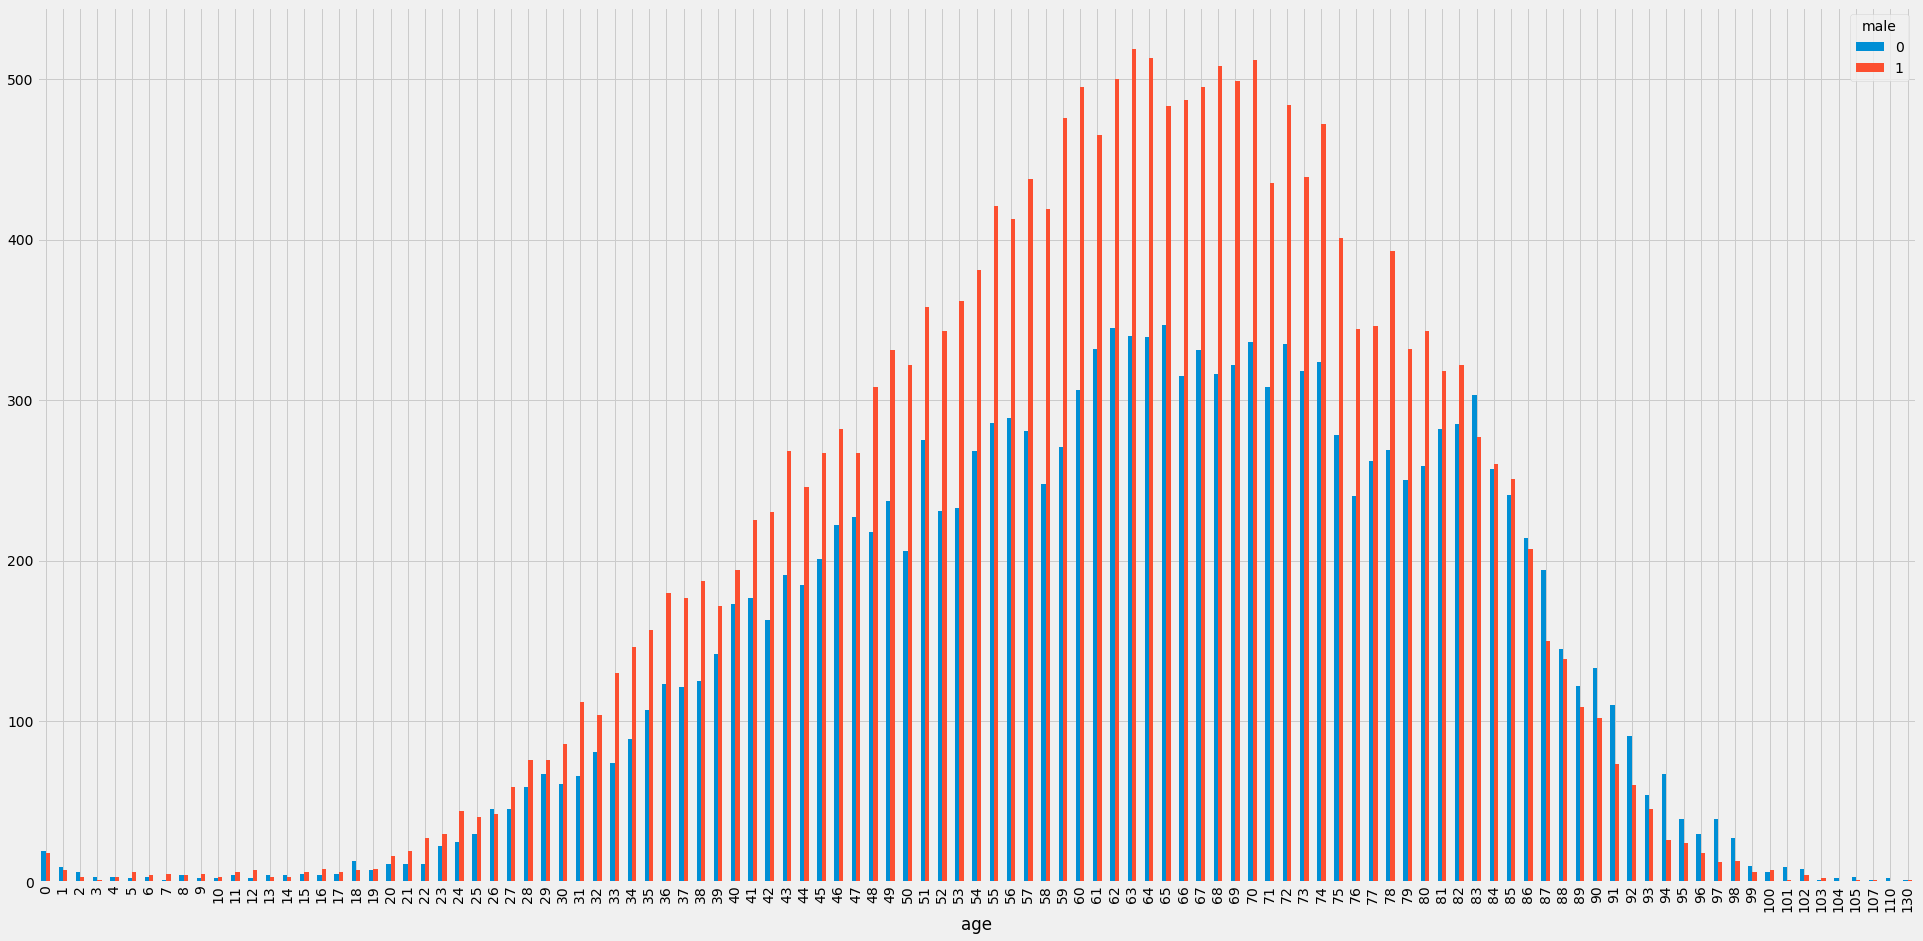

In [12]:
df3 = df_death
by_year_gender = df3.groupby(['age','male'])
year_gen_sz = by_year_gender.size().unstack()
year_gen_sz.plot(kind='bar', figsize=(30,15))

In [13]:
df3.describe()

,days_dose1,days_dose2,days_dose3,state,age,male,comorb,malaysian,death
count,35585.000000,35585.000000,35585.000000,35585.000000,35585.000000,35585.000000,35585.000000,35585.000000,35585.0
mean,33.882844,25.351131,1.628186,7.894309,62.285851,0.574343,0.785471,0.888268,1.0
std,68.459427,60.502780,12.342408,4.252259,16.450069,0.494449,0.410501,0.315041,0.0
min,-231.000000,-76.000000,-50.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,4.000000,51.000000,0.000000,1.000000,1.000000,1.0
50%,0.000000,0.000000,0.000000,10.000000,63.000000,1.000000,1.000000,1.000000,1.0
75%,25.000000,0.000000,0.000000,10.000000,74.000000,1.000000,1.000000,1.000000,1.0
max,365.000000,344.000000,165.000000,16.000000,130.000000,1.000000,1.000000,1.000000,1.0


In [14]:
df3['b1'] = df3['brand1'].isnull()
df3['b2'] = df3['brand2'].isnull()
df3['b3'] = df3['brand3'].isnull()

In [15]:
df3['bb1'] = df3['b1'].map({True: 0, False: 1})
df3['bb2'] = df3['b2'].map({True: 0, False: 1})
df3['bb3'] = df3['b3'].map({True: 0, False: 1})

In [16]:
df3['number_dose'] = df3['bb1'] + df3['bb2'] + df3['bb3']

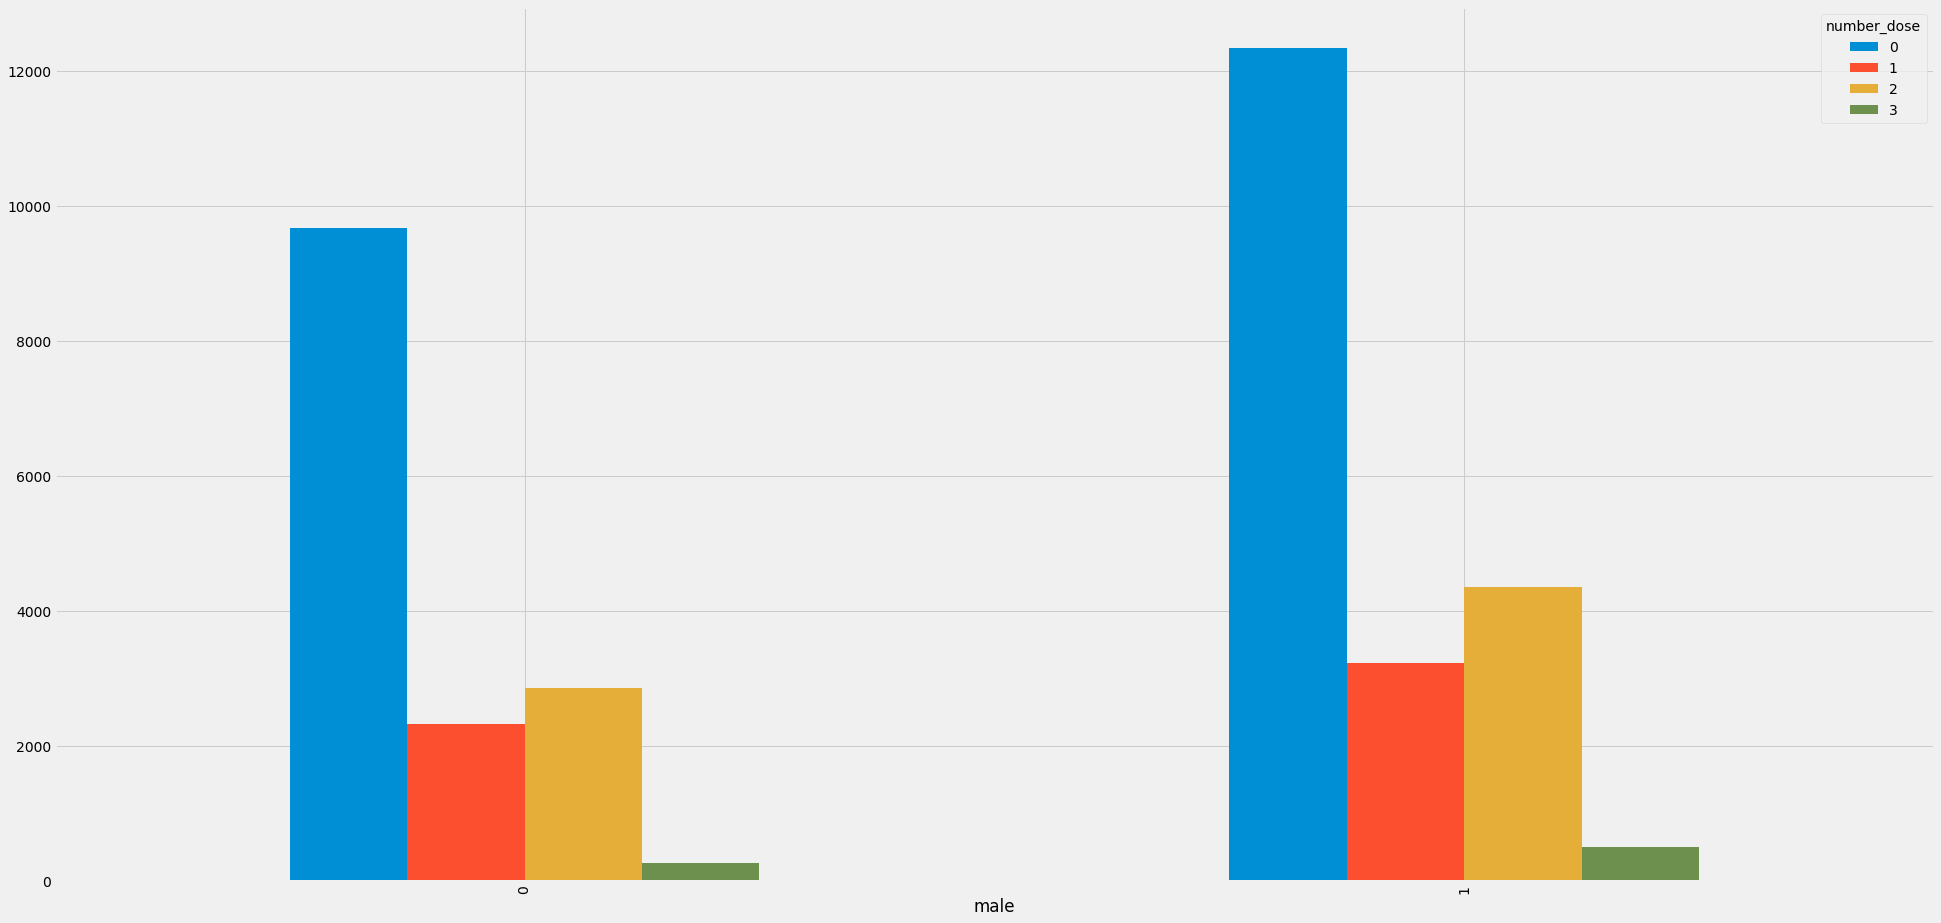

In [17]:
by_year_gender = df3.groupby(['male','number_dose'])
year_gen_sz = by_year_gender.size().unstack()
year_gen_sz.plot(kind='bar', figsize=(30,15))

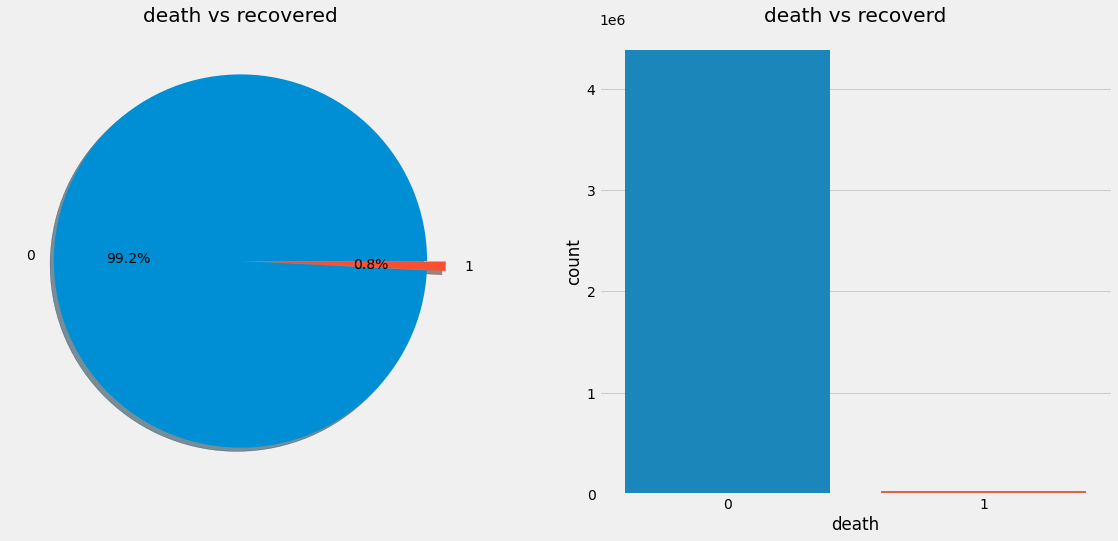

In [18]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['death'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('death vs recovered')
ax[0].set_ylabel('')
sns.countplot('death',data=df,ax=ax[1])
ax[1].set_title('death vs recoverd')
plt.show()

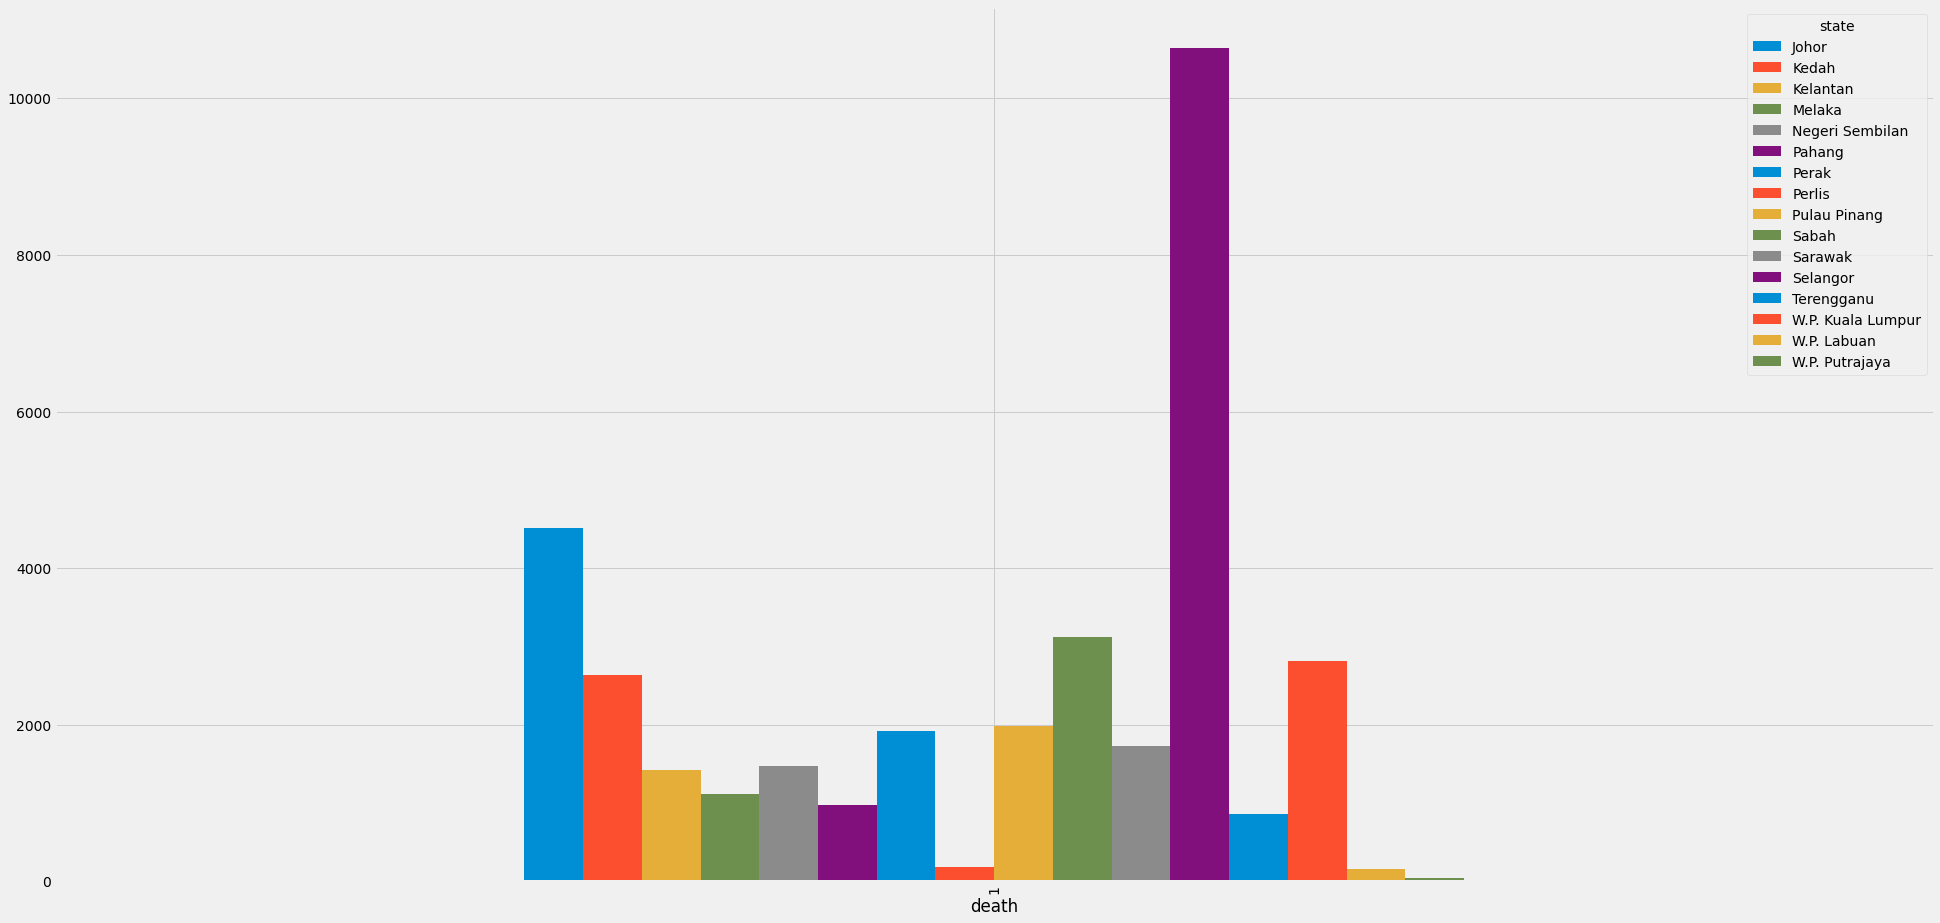

In [19]:
df3['state'] = df3['state'].replace([1],'Johor')
df3['state'] = df3['state'].replace([2],'Kedah')
df3['state'] = df3['state'].replace([3],'Kelantan')
df3['state'] = df3['state'].replace([4],'Melaka')
df3['state'] = df3['state'].replace([5],'Negeri Sembilan')
df3['state'] = df3['state'].replace([6],'Pahang')
df3['state'] = df3['state'].replace([7],'Pulau Pinang')
df3['state'] = df3['state'].replace([8],'Perak')
df3['state'] = df3['state'].replace([9],'Perlis')
df3['state'] = df3['state'].replace([10],'Selangor')
df3['state'] = df3['state'].replace([11],'Terengganu')
df3['state'] = df3['state'].replace([12],'Sabah')
df3['state'] = df3['state'].replace([13],'Sarawak')
df3['state'] = df3['state'].replace([14],'W.P. Kuala Lumpur')
df3['state'] = df3['state'].replace([15],'W.P. Labuan')
df3['state'] = df3['state'].replace([16],'W.P. Putrajaya')
by_year_gender = df3.groupby(['death','state'])
year_gen_sz = by_year_gender.size().unstack()
year_gen_sz.plot(kind='bar', figsize=(30,15))

In [20]:
# create new dataframe for this stage
df1 = df

In [21]:
# create new column and convert null value to 0
df1['b1'] = df1['brand1'].notnull()
df1['b2'] = df1['brand2'].notnull()
df1['b3'] = df1['brand3'].notnull()

In [26]:
df1.head(10)

,date_positive,days_dose1,days_dose2,days_dose3,brand1,brand2,brand3,state,age,male,comorb,malaysian,death,b1,b2,b3
0,2020-01-25,0.0,0.0,0.0,NaN,NaN,NaN,1,40,1,1,0,0,False,False,False
1,2020-01-29,0.0,0.0,0.0,NaN,NaN,NaN,1,34,0,0,0,0,False,False,False
2,2020-01-29,0.0,0.0,0.0,NaN,NaN,NaN,1,52,1,0,0,0,False,False,False
3,2020-01-29,0.0,0.0,0.0,NaN,NaN,NaN,2,4,0,1,0,0,False,False,False
4,2020-01-30,0.0,0.0,0.0,NaN,NaN,NaN,1,49,0,0,0,0,False,False,False
5,2020-02-04,0.0,0.0,0.0,NaN,NaN,NaN,10,42,1,0,1,0,False,False,False
6,2020-02-04,0.0,0.0,0.0,NaN,NaN,NaN,14,63,1,0,0,0,False,False,False
7,2020-02-05,0.0,0.0,0.0,NaN,NaN,NaN,5,8,1,0,1,0,False,False,False
8,2020-02-05,0.0,0.0,0.0,NaN,NaN,NaN,5,44,1,0,1,0,False,False,False
9,2020-02-06,0.0,0.0,0.0,NaN,NaN,NaN,2,40,0,1,1,0,False,False,False


In [23]:
from sklearn.preprocessing import StandardScaler

scaled_features = df1.copy()

col_names = ['age']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features

In [24]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [25]:
from sklearn.metrics import mean_squared_error

In [27]:
X = scaled_features[['days_dose1','days_dose2','days_dose3','state','age','male','comorb','b1','b2','b3','malaysian']]
y = scaled_features['death']

In [29]:

# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot
model = XGBClassifier()
model.fit(X, y)

[02:25:30] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBClassifier()

[0.06873953 0.08203761 0.08232502 0.09869122 0.11343273 0.01711296
 0.20205615 0.         0.18305072 0.145037   0.00751714]


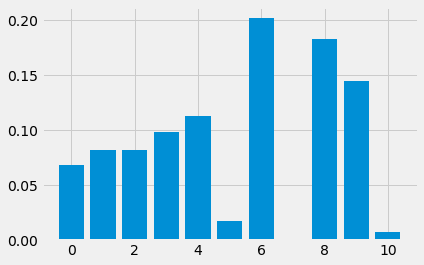

In [30]:
# feature importance
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [31]:
X.head(10)

,days_dose1,days_dose2,days_dose3,state,age,male,comorb,b1,b2,b3,malaysian
0,0.0,0.0,0.0,1,0.387398,1,1,False,False,False,0
1,0.0,0.0,0.0,1,0.060595,0,0,False,False,False,0
2,0.0,0.0,0.0,1,1.041004,1,0,False,False,False,0
3,0.0,0.0,0.0,2,-1.573419,0,1,False,False,False,0
4,0.0,0.0,0.0,1,0.877603,0,0,False,False,False,0
5,0.0,0.0,0.0,10,0.496332,1,0,False,False,False,1
6,0.0,0.0,0.0,14,1.640143,1,0,False,False,False,0
7,0.0,0.0,0.0,5,-1.355551,1,0,False,False,False,1
8,0.0,0.0,0.0,5,0.605267,1,0,False,False,False,1
9,0.0,0.0,0.0,2,0.387398,0,1,False,False,False,1


In [32]:
X = scaled_features[['state','age','comorb','b1','b2','b3']]
y = scaled_features['death']

In [33]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour
sampler1  = CondensedNearestNeighbour(n_neighbors=3,random_state=42)
sampler2 = RandomUnderSampler(random_state=42)
sampler3 = NearMiss(version=3, n_neighbors_ver3=3)

In [ ]:
X_train_cnn, y_train_cnn = sampler1.fit_resample(X, y)
y_train_cnn.value_counts()

In [ ]:
X_train_rus, y_train_rus = sampler2.fit_resample(X, y)
y_train_rus.value_counts()

In [ ]:
X_train_nm, y_train_nm = sampler3.fit_resample(X, y)
y_train_nm.value_counts()

In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X, y)
y_train_sm.value_counts()

In [ ]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=130)
X_train_ada, y_train_ada = ada.fit_resample(X, y)
y_train_ada.value_counts()

In [ ]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    accuracy_score,
)

# define a function to calculate evaluation metrics
def test_eval(clf_model, y_test, y_pred, algo=None, results=None, show_results=True):
    if results is None:
        # create a dataframe to store results
        results = pd.DataFrame(
            columns=[
                "algo",
                "accuracy",
                "precision",
                "recall",
                "F1score",
                "confusion_matrix",
            ]
        )

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1score = f1_score(y_test, y_pred)
    cf_matrix = confusion_matrix(y_test, y_pred)

    # store results
    results = results.append(
        {
            "algo": algo,
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "F1score": F1score,
            "confusion_matrix": cf_matrix,
        },
        ignore_index=True,
    )

    # print results
    if show_results:
        print(
            "Confusion Matrix",
            "\n",
            "=" * 60,
            "\n",
            confusion_matrix
        )
        
        print(
            "Classification Report\n",
            "=" * 60,
            "\n",
            classification_report(y_test, y_pred),
        )

    return results


In [ ]:
# import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict


In [ ]:
estimators = [2,10,30,50,100]
# Maximum number of depth in each tree:
max_depth = [i for i in range(5,16,2)]
# Minimum number of samples to consider to split a node:
min_samples_split = [2, 5, 10, 15, 20, 50, 100]
# Minimum number of samples to consider at each leaf node:
min_samples_leaf = [1, 2, 5]
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10)
y_rf_pred = cross_val_predict(rf_model, X, y, cv=5)